`EXACT SOLUTION`

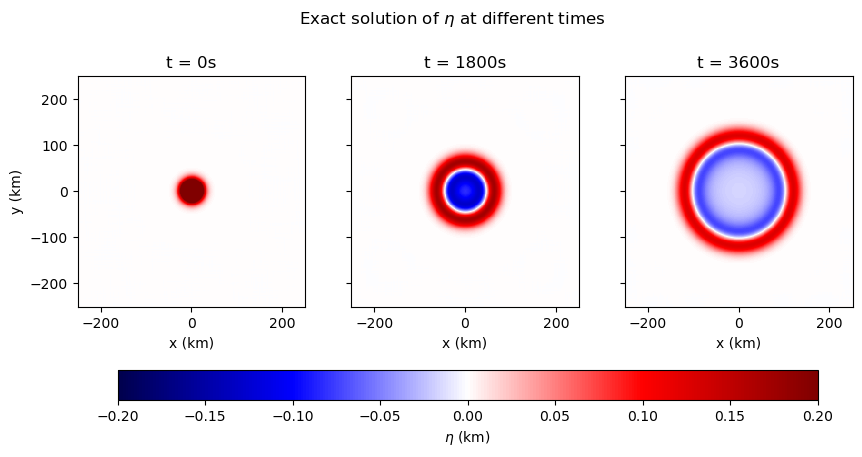

In [1]:
# Modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import  fftshift,fft2, ifft2, ifftshift
import warnings
warnings.simplefilter('ignore')

# Constants
Lx, Ly = 500000, 500000
ax, ay = 20000, 20000
dx, dy = 2000, 2000
Nx, Ny = Lx/dx, Ly/dy
m = 2
g = 9.81
H = 100
dt = 20
t = np.arange(0,3601,dt)

# Domain
x = np.arange(-250000,250000+dx,dx)
y = np.arange(-250000,250000+dx,dy)
x_grid, y_grid = np.meshgrid(x, y)

# Wavenumbers
k=2*np.pi*fftshift(np.fft.fftfreq(len(x), dx))
l=2*np.pi*fftshift(np.fft.fftfreq(len(y), dy))
k_grid, l_grid = np.meshgrid(k,l)

# Dispersion relation
omega = np.sqrt(g*H*(k_grid**2+l_grid**2))

# Initial condition
fxy = np.exp(-(x_grid / ax) ** m) * np.exp(-(y_grid / ay) ** m)
ffxy = fftshift(fft2(fxy))

# Exact solution
time_step = [0,1800,3600]
eta_timestep = np.zeros((3,len(x),len(y)))
eta_solution = np.zeros((3,len(x),len(y)))
for i in range(3):
    eta_timestep[i] = ffxy*np.cos(omega*time_step[i])
    eta_solution[i] = np.real(ifft2(ifftshift(eta_timestep[i])))
    
# Plot
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 3), sharey=True)

for i, t in enumerate(time_step):
    color_plot = axs[i].pcolormesh(x / 1e3, y / 1e3, eta_solution[i], cmap='seismic', vmin=-0.2, vmax=0.2)
    axs[i].set_title(f't = {t}s')
    axs[i].set_xlabel('x (km)')
    if i == 0:
        axs[i].set_ylabel('y (km)')

# Create a colorbar with a separate axis and position it below the subplots
cbar_ax = fig.add_axes([0.165, -0.2, 0.7, 0.1])
fig.colorbar(color_plot, cax=cbar_ax, orientation='horizontal', label='$\eta$ (km)')
plt.suptitle('Exact solution of $\eta$ at different times', y=1.1)
plt.show()